## Questions: 

1. Rank top 3 Breweries which produce the strongest beers?
2. Which year did beers enjoy the highest ratings? 
3. Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?
4. If you were to recommend 3 beers to your friends based on this data which ones will you recommend?
5. Which Beer style seems to be the favorite based on reviews written by users? 
6. How does written review compare to overall review score for the beer styles?
7. How do find similar beer drinkers by using written reviews only?   


## 1. Data Importing and reading csv file

In [1]:
# Importing important libraries

import pandas as pd
import numpy as np

In [2]:
# import dataset
beer_df= pd.read_csv('BeerDataScienceProject.csv',encoding = "ISO-8859-1")
beer_df.head()

beer_ABV  beer_beerId  beer_brewerId               beer_name  \
0       5.0        47986          10325            Sausa Weizen   
1       6.2        48213          10325                Red Moon   
2       6.5        48215          10325  Black Horse Black Beer   
3       5.0        47969          10325              Sausa Pils   
4       7.7        64883           1075           Cauldron DIPA   

                       beer_style  review_appearance  review_palette  \
0                      Hefeweizen                2.5             2.0   
1              English Strong Ale                3.0             2.5   
2          Foreign / Export Stout                3.0             2.5   
3                 German Pilsener                3.5             3.0   
4  American Double / Imperial IPA                4.0             4.5   

   review_overall  review_taste review_profileName  review_aroma  \
0             1.5           1.5            stcules           1.5   
1             3.0           3.0            stcules           3.0   
2             3.0           3.0            stcules           3.0   
3             3.0           2.5            stcules           3.0   
4             4.0           4.0     johnmichaelsen           4.5   

                                         review_text  review_time  
0  A lot of foam. But a lot. In the smell some ba...   1234817823  
1  Dark red color, light beige foam, average. In ...   1235915097  
2  Almost totally black. Beige foam, quite compac...   1235916604  
3  Golden yellow color. White, compact foam, quit...   1234725145  
4  According to the website, the style for the Ca...   1293735206

## 2. Understanding data

In [3]:
# Common function to understand data 
def data_understand(df):
    print(df.shape)
    print('*'*70)
    print(df.info())
    print('*'*100)
    print(df.describe())

In [4]:
data_understand(beer_df)

(528870, 13)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 5

In [5]:
# fetch year from time column
beer_df['year'] = pd.DatetimeIndex(pd.to_datetime(beer_df['review_time'], unit='s')).year
beer_df.head()

beer_ABV  beer_beerId  beer_brewerId               beer_name  \
0       5.0        47986          10325            Sausa Weizen   
1       6.2        48213          10325                Red Moon   
2       6.5        48215          10325  Black Horse Black Beer   
3       5.0        47969          10325              Sausa Pils   
4       7.7        64883           1075           Cauldron DIPA   

                       beer_style  review_appearance  review_palette  \
0                      Hefeweizen                2.5             2.0   
1              English Strong Ale                3.0             2.5   
2          Foreign / Export Stout                3.0             2.5   
3                 German Pilsener                3.5             3.0   
4  American Double / Imperial IPA                4.0             4.5   

   review_overall  review_taste review_profileName  review_aroma  \
0             1.5           1.5            stcules           1.5   
1             3.0           3.0            stcules           3.0   
2             3.0           3.0            stcules           3.0   
3             3.0           2.5            stcules           3.0   
4             4.0           4.0     johnmichaelsen           4.5   

                                         review_text  review_time  year  
0  A lot of foam. But a lot. In the smell some ba...   1234817823  2009  
1  Dark red color, light beige foam, average. In ...   1235915097  2009  
2  Almost totally black. Beige foam, quite compac...   1235916604  2009  
3  Golden yellow color. White, compact foam, quit...   1234725145  2009  
4  According to the website, the style for the Ca...   1293735206  2010

In [6]:
beer_df['year'].unique()

array([2009, 2010, 2012, 2011, 2004, 2003, 2008, 2007, 2006, 2005, 2002,
       2001, 2000, 1999, 1998])

## 3. Cleaning Data

In [7]:
# Get a series object containing the count of unique elements
# in each column of dataframe
def uniqueval(df):
    uniqueValues = df.nunique()
    print('Count of unique values in each column :')
    print(uniqueValues)



In [8]:
uniqueval(beer_df)

Count of unique values in each column :
beer_ABV                 283
beer_beerId            20200
beer_brewerId           1803
beer_name              18339
beer_style               104
review_appearance         10
review_palette             9
review_overall            10
review_taste               9
review_profileName     22800
review_aroma               9
review_text           528371
review_time           527927
year                      15
dtype: int64


In [9]:
#count null values
beer_df.isna().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
year                      0
dtype: int64

In [10]:
# Common function to check null, Nan, Missing Values
def null_check(df):
#    print(df.isnull().sum())
    if df.isnull().sum().sum() > 0:
        null_total = df.isnull().sum().sort_values(ascending=False) 
        total = null_total[null_total > 0]

        null_percent = round(df.isnull().mean().sort_values(ascending=False)*100,2)
        percent = null_percent[null_percent > 0] 

        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
        print(f'Total and Percentage of NaN:\n {missing_data}')
    else:
        print("No null value present in the df.")

In [11]:
null_check(beer_df)

Total and Percentage of NaN:
                     Total  Percent
beer_ABV            20280     3.83
review_text           119     0.02
review_profileName    115     0.02


- Since the percentage of missing values is low we will drop the rows having null values

In [12]:
#Dropping the rows having null values
beer_df = beer_df.dropna()

In [13]:
# now check null values in dataframe
null_check(beer_df)

No null value present in the df.


In [14]:
# check the shape of df

beer_df.shape

(508358, 14)

### Removing the duplicate data




- If a user has rated the same beer more than once, then only keep their highest rating and remove others.

In [15]:
before_duplicate_removal = len(beer_df.index)
# Sort by user overall rating first
beer_df = beer_df.sort_values('review_overall', ascending=False)

In [16]:

# Keep the highest rating from each user and drop the rest 
beer_df = beer_df.drop_duplicates(subset=['review_profileName', 'beer_name'], keep='first')
after_duplicate_removal = len(beer_df.index)

In [17]:
# Percent of data that are duplicates
print("Removing all duplicate values drops about", round((before_duplicate_removal - after_duplicate_removal)/ before_duplicate_removal * 100, 2),"% ")

Removing all duplicate values drops about 1.1 % 


In [18]:
# check the shape of df
beer_df.shape

(502769, 14)

### Remove ratings value which are invalid (i.e <0 and >5 )

In [19]:
beer_df =beer_df[( (beer_df['review_overall'] >= 1) | (beer_df['review_overall'] <=5) ) | ( (beer_df['review_appearance'] >= 1) | (beer_df['review_appearance'] <= 5) )]


In [20]:
data_understand(beer_df)

(502769, 14)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 502769 entries, 492945 to 39638
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            502769 non-null  float64
 1   beer_beerId         502769 non-null  int64  
 2   beer_brewerId       502769 non-null  int64  
 3   beer_name           502769 non-null  object 
 4   beer_style          502769 non-null  object 
 5   review_appearance   502769 non-null  float64
 6   review_palette      502769 non-null  float64
 7   review_overall      502769 non-null  float64
 8   review_taste        502769 non-null  float64
 9   review_profileName  502769 non-null  object 
 10  review_aroma        502769 non-null  float64
 11  review_text         502769 non-null  object 
 12  review_time         502769 non-null  int64  
 13  year                502769 non-null  int64  
d

## 4. Data analysis

In [21]:
# importing libraries to visualize the data

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

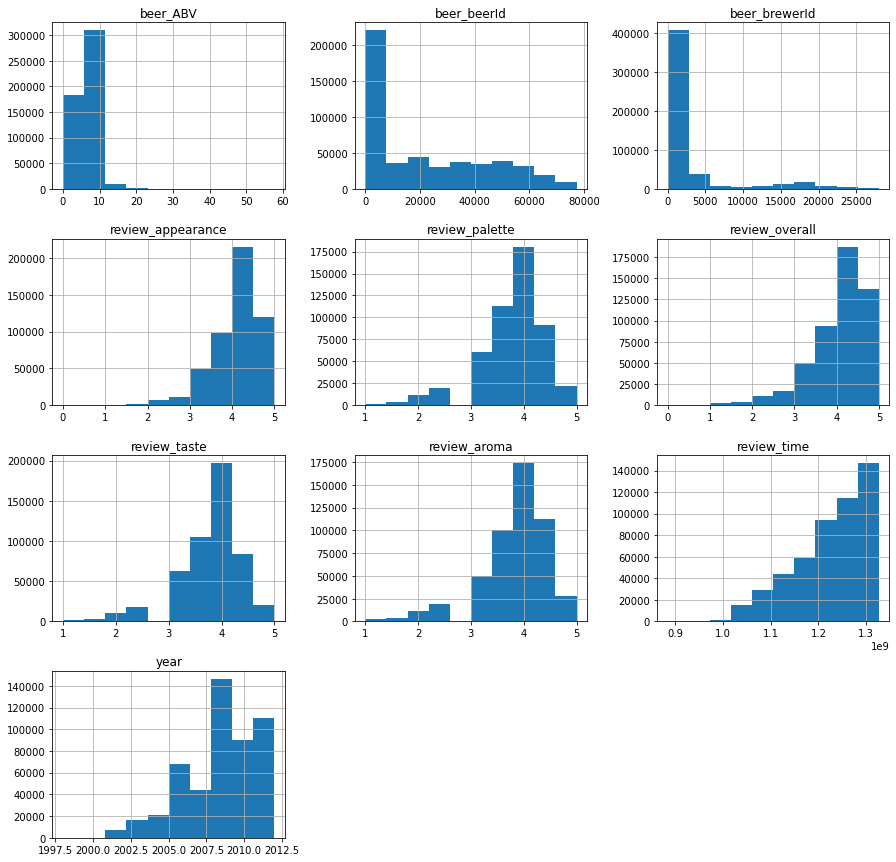

In [22]:
beer_df.hist(figsize=(15,15))
plt.show()

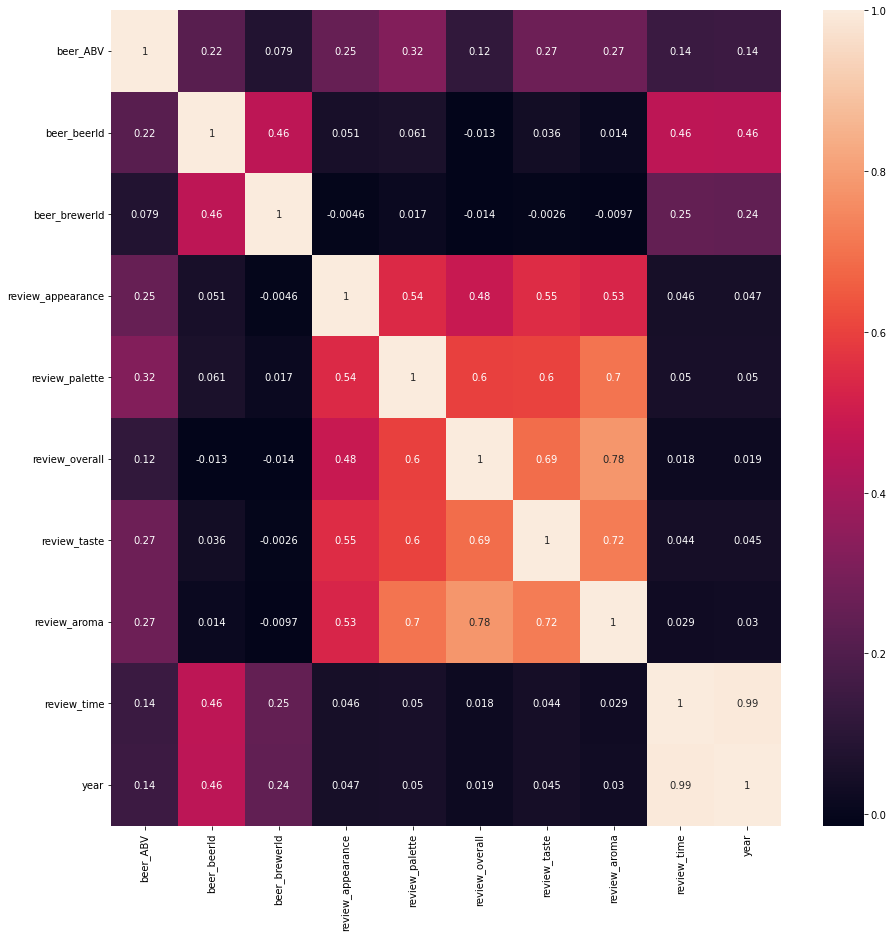

In [23]:
# check for correlation 
plt.figure(figsize=(15,15))
sns.heatmap(beer_df.corr(), annot=True)
plt.show()

<AxesSubplot:title={'center':'Popular Beers by Style'}>

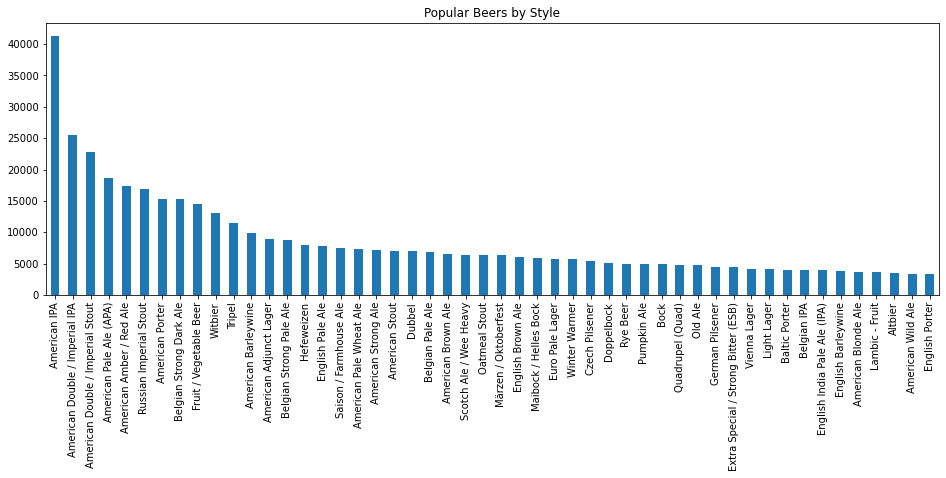

In [24]:
#Beer style

beer_df['beer_style'].value_counts().head(50).plot.bar(figsize=(16,5),title= 'Popular Beers by Style')

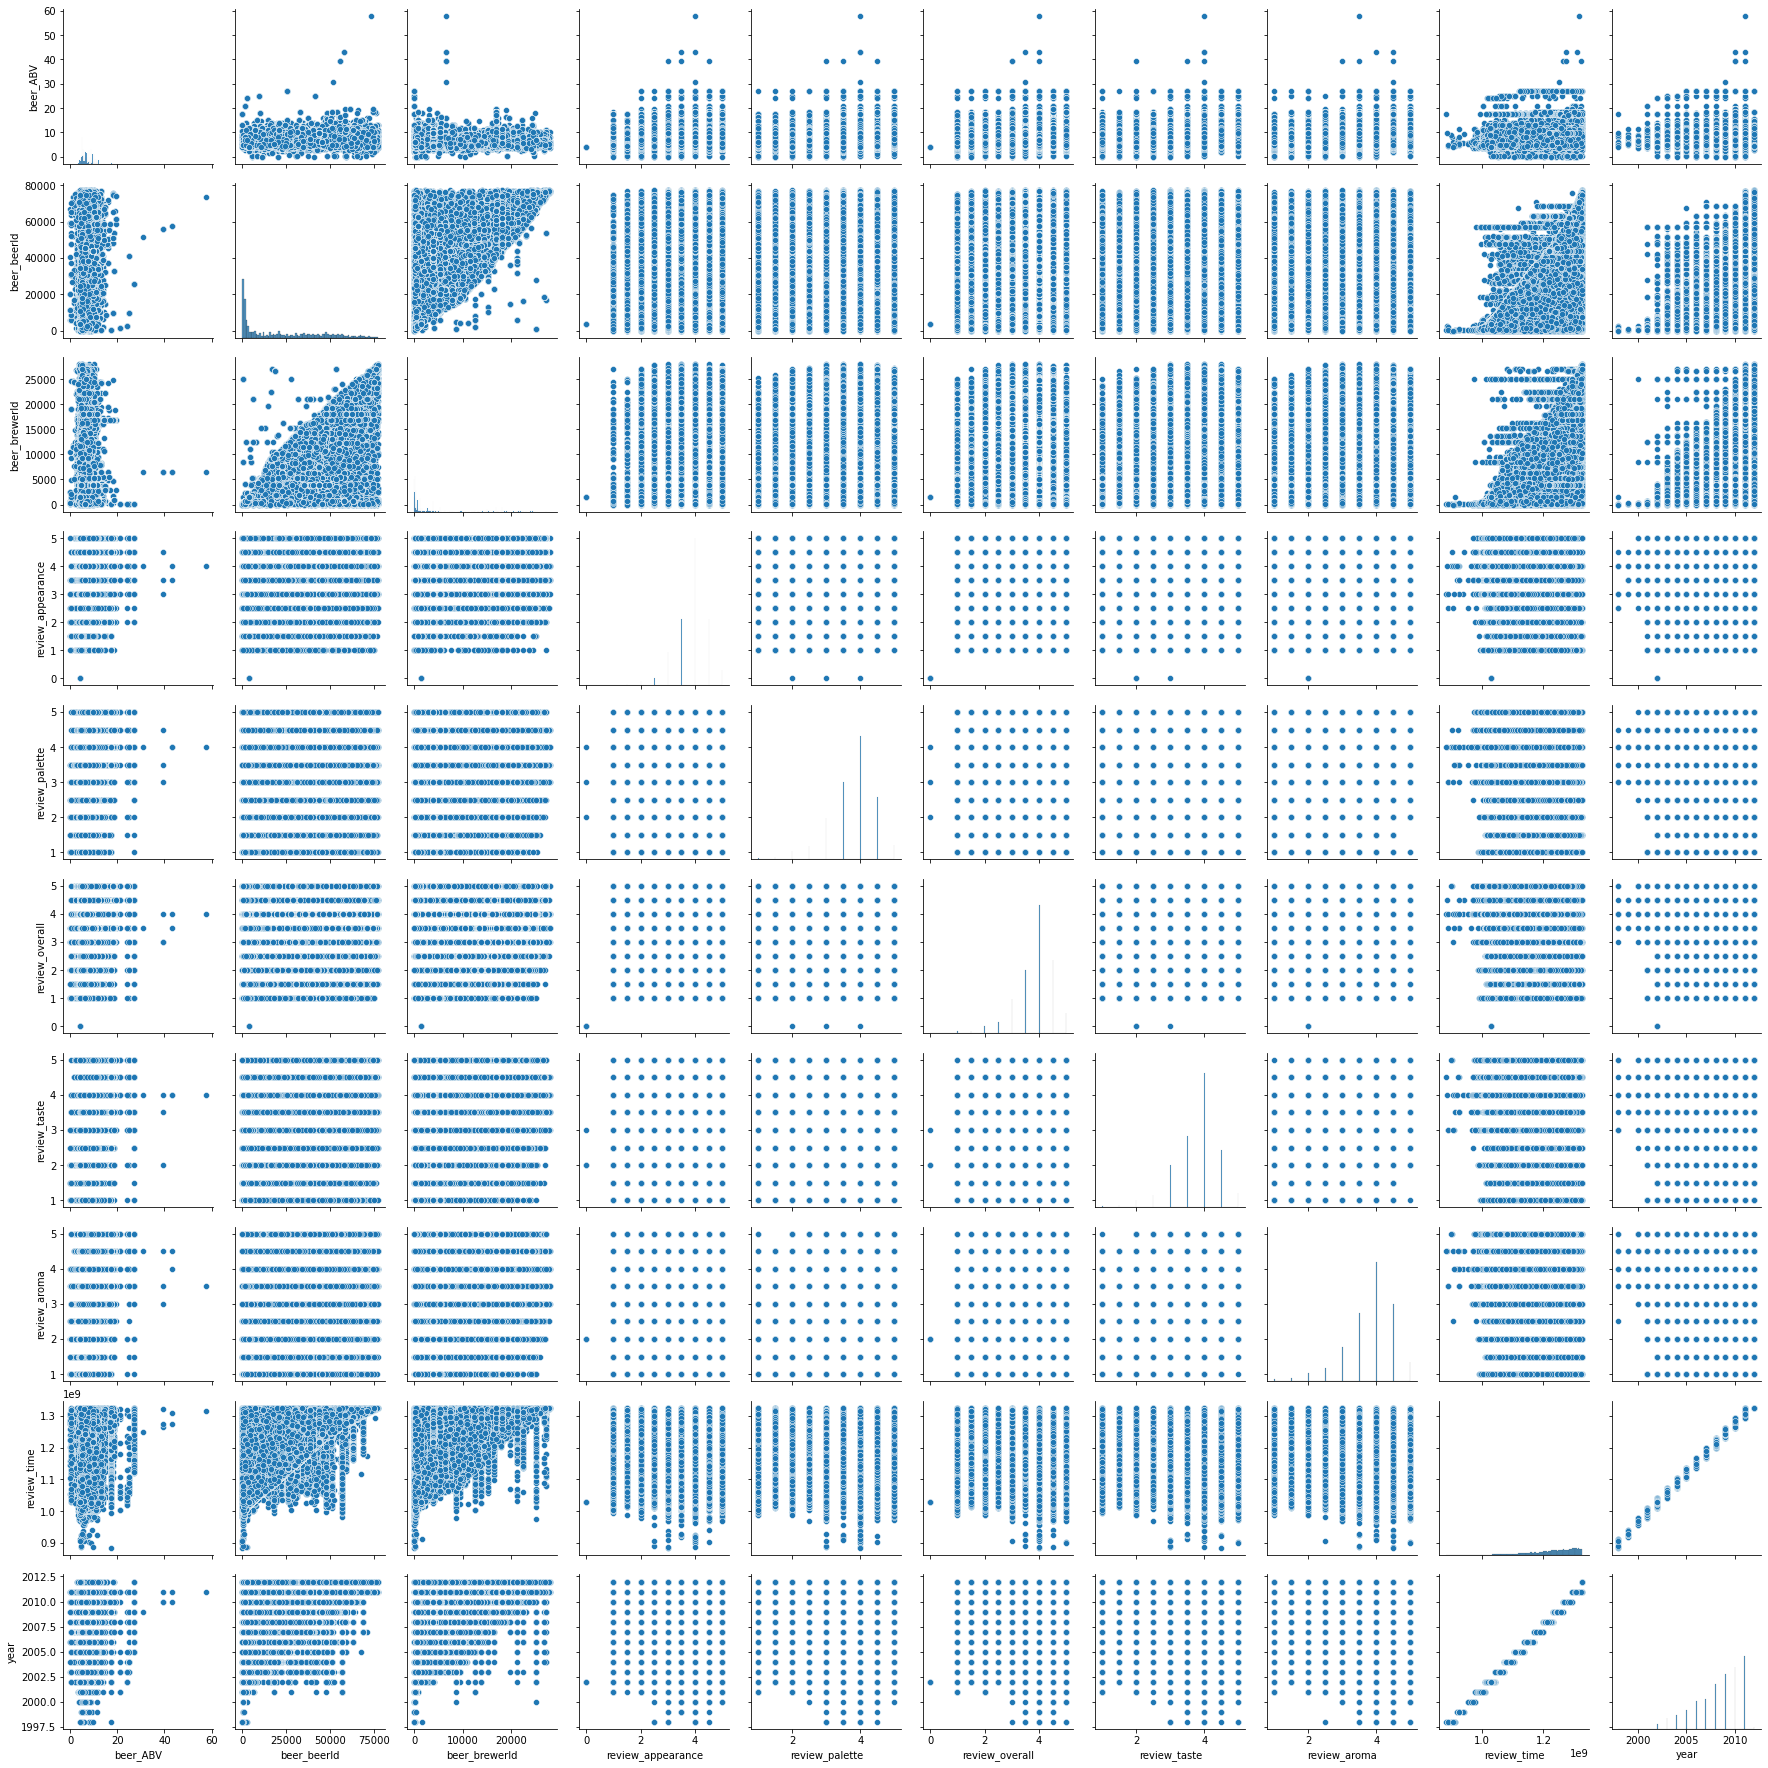

In [25]:
sns.pairplot(data=beer_df)

# Questions:

## Q. 1. Rank top 3 Breweries which produce the strongest beers?

In [26]:
import plotly.express as px

In [27]:
beer_df.beer_brewerId.value_counts()

35       38526
140      28232
132      23111
1199     19646
3818     15640
         ...  
3724         1
9256         1
9608         1
19749        1
10393        1
Name: beer_brewerId, Length: 1605, dtype: int64

In [28]:
df_brew = beer_df.groupby('beer_brewerId')['beer_ABV'].mean()
df_brew = pd.DataFrame(data=df_brew).sort_values(by=['beer_ABV'],ascending=False).reset_index()


In [29]:
fig = px.scatter(df_brew, x="beer_brewerId",y="beer_ABV")
fig.show()

In [30]:
df_brew.head(3)

beer_brewerId   beer_ABV
0           6513  19.228824
1            736  13.750000
2          24215  12.466667

##### - The top 3 breweries which produce the strongest beer can recognized by below brewery ids.
 1. 6513
 2. 736
 3. 24215

## Q. 2 Which year did beers enjoy the highest ratings?

In [31]:
beer_df.groupby('year')['year'].count()

year
1998        11
1999        10
2000        29
2001       537
2002      6719
2003     16259
2004     20993
2005     27453
2006     40298
2007     43972
2008     65765
2009     80293
2010     90351
2011    107021
2012      3058
Name: year, dtype: int64

In [32]:
df_date = beer_df.loc[:,['year','review_overall']]

In [33]:
df_date = df_date.groupby('year')[['review_overall']].mean().sort_values('review_overall',ascending = False).reset_index()
df_date

year  review_overall
0   2000        4.241379
1   1998        4.045455
2   1999        4.000000
3   2001        3.963687
4   2010        3.870411
5   2009        3.869223
6   2005        3.846319
7   2008        3.841215
8   2012        3.839438
9   2011        3.834009
10  2002        3.821179
11  2007        3.820352
12  2006        3.809792
13  2004        3.807436
14  2003        3.775693

In [34]:
fig = px.scatter(df_date,x="year",y="review_overall")
fig.show()

- Beers enjoyed the highest ratings in the year 2000.

## Q. 3 Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

In [35]:
df_fac = beer_df.loc[:,['review_taste','review_aroma','review_appearance', 'review_palette', 'review_overall']]
df_fac

review_taste  review_aroma  review_appearance  review_palette  \
492945           4.5           5.0                4.5             3.0   
172728           4.5           4.0                5.0             3.0   
409699           4.5           4.5                4.0             4.0   
517331           4.5           4.5                4.5             4.5   
172704           4.0           5.0                3.0             3.5   
...              ...           ...                ...             ...   
412462           2.0           1.0                4.0             3.5   
188052           2.0           1.0                1.0             1.0   
39601            3.0           2.0                0.0             2.0   
39617            2.0           2.0                0.0             4.0   
39638            2.0           2.0                0.0             3.0   

        review_overall  
492945             5.0  
172728             5.0  
409699             5.0  
517331             5.0  
172704             5.0  
...                ...  
412462             1.0  
188052             1.0  
39601              0.0  
39617              0.0  
39638              0.0  

[502769 rows x 5 columns]

In [36]:
df_fac.corr()

review_taste  review_aroma  review_appearance  \
review_taste           1.000000      0.722357           0.551516   
review_aroma           0.722357      1.000000           0.530783   
review_appearance      0.551516      0.530783           1.000000   
review_palette         0.600336      0.702967           0.544325   
review_overall         0.688935      0.780247           0.482822   

                   review_palette  review_overall  
review_taste             0.600336        0.688935  
review_aroma             0.702967        0.780247  
review_appearance        0.544325        0.482822  
review_palette           1.000000        0.597741  
review_overall           0.597741        1.000000

<AxesSubplot:>

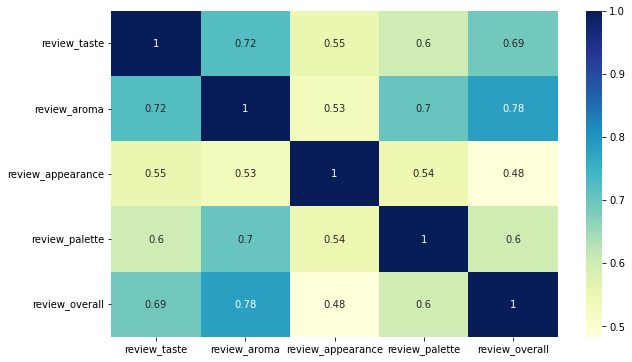

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df_fac.corr(), annot=True,cmap="YlGnBu")

- The 'review_aroma' feature is most correlated with the 'review_overall' feature. 
- It is an important feature based on user's review and different ratings.

## Q.4 If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

In [38]:
beer_df.groupby('beer_name')['beer_name'].count().sort_values(ascending=False)

beer_name
Sierra Nevada Celebration Ale                 2928
Sierra Nevada Pale Ale                        2525
La Fin Du Monde                               2477
Founders Breakfast Stout                      2443
Sierra Nevada Bigfoot Barleywine Style Ale    2443
                                              ... 
Klostermann Polotmavý Leák 13°                  1
Kneel Young                                      1
Knightro  Celtic Festival Beer                  1
Koff                                             1
"100" Pale Ale                                   1
Name: beer_name, Length: 14028, dtype: int64

In [39]:
df_recommend = beer_df.loc[:,['beer_name','review_overall','beer_ABV']]
df_recommend

beer_name  review_overall  beer_ABV
492945          Hazelnut Brown Nectar             5.0       6.2
172728      Red Stripe Jamaican Lager             5.0       4.7
409699           Tröegs Nugget Nectar             5.0       7.5
517331   Samuel Smith's Oatmeal Stout             5.0       5.0
172704      Red Stripe Jamaican Lager             5.0       4.7
...                               ...             ...       ...
412462     Great Lakes Grassroots Ale             1.0       6.2
188052  Earthquake High Gravity Lager             1.0      12.0
39601                        Pub Pils             0.0       4.0
39617               Latter Days Stout             0.0       4.0
39638                   Utah Pale Ale             0.0       4.0

[502769 rows x 3 columns]

In [40]:
df_recommend.groupby('beer_name')['review_overall','beer_ABV'].mean().reset_index().sort_values(by = ['review_overall','beer_ABV'],ascending = False).head(10)

beer_name  review_overall  \
444                   AleSmith Speedway Stout - Oak Aged             5.0   
9624   Pilot Series Imperial Sweet Stout - Palm Ridge...             5.0   
1330                               Bees Knees Barleywine             5.0   
2588                                Calapooia Barleywine             5.0   
8375                                       Mother Pucker             5.0   
8754                                     Nine Tailed Fox             5.0   
7655                              Love Child Belgiweizen             5.0   
8614                                       New World IPA             5.0   
12003                      Strongman Belgian Strong Dark             5.0   
1108                              Barley Wine Yeast Beer             5.0   

       beer_ABV  
444        12.0  
9624       12.0  
1330       11.2  
2588       11.0  
8375       11.0  
8754       11.0  
7655       10.4  
8614       10.3  
12003      10.3  
1108       10.0

-  1. AleSmith Speedway Stout - Oak Aged
-  2. Pilot Series Imperial Sweet Stout - Palm Ridge Reserve Barrel Aged
-  3. Bees Knees Barleywine

## Q . 5 Which Beer style seems to be the favorite based on reviews written by users?

In [41]:
df_reviews = beer_df.loc[:,['beer_style','review_text']].sort_values(by='beer_style')
df_reviews = df_reviews.iloc[0:100000,:]

In [42]:
df_reviews.head()

beer_style                                        review_text
169932    Altbier  This is a highly drinkable ale.As of this revi...
173386    Altbier  Served 12oz bottle,pour revealed a nice rich r...
173388    Altbier  This is a delicious beer. From what I understa...
173392    Altbier  This is my second time trying this style of be...
173394    Altbier  Appearance: Pours a clear brownish-copper. Top...

In [43]:
df_reviews.groupby('beer_style')['review_text'].count().nlargest(10)

beer_style
American Double / Imperial IPA      25433
American Amber / Red Ale            17325
American Double / Imperial Stout    16815
American Barleywine                  9872
American Adjunct Lager               8900
American Brown Ale                   6509
American Blonde Ale                  3620
Altbier                              3508
American Black Ale                   2939
American Amber / Red Lager           2754
Name: review_text, dtype: int64

In [44]:
#convert to lowercase
df_reviews['review_text'] = df_reviews['review_text'].apply(lambda x: x.lower()) 

In [45]:
df_reviews.head()

beer_style                                        review_text
169932    Altbier  this is a highly drinkable ale.as of this revi...
173386    Altbier  served 12oz bottle,pour revealed a nice rich r...
173388    Altbier  this is a delicious beer. from what i understa...
173392    Altbier  this is my second time trying this style of be...
173394    Altbier  appearance: pours a clear brownish-copper. top...

In [46]:
# Pre-Processing and cleaning the "review_text" column
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm
nlp = en_core_web_sm.load()
import re

In [47]:
def decontracted(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [48]:
df_reviews['review_text'] = df_reviews['review_text'].apply(lambda x: decontracted(x))  

In [49]:
#Special Chars removal or punctuation removal
df_reviews['review_text'] = df_reviews['review_text'].apply(lambda x: re.sub('[^a-z ]+', '', x))


In [50]:
#Remove multiple spaces
df_reviews['review_text'] = df_reviews['review_text'].apply(lambda x: " ".join(x.split()))


In [51]:

#Remove Stop Words
df_reviews['review_text'] = df_reviews['review_text'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))


In [52]:
df_reviews.sample(5)

beer_style  \
179845  American Double / Imperial Stout   
186491          American Amber / Red Ale   
433321            American Adjunct Lager   
255110               American Barleywine   
410539          American Amber / Red Ale   

                                              review_text  
179845  thanks buddy al great rare pickup indiana grea...  
186491  way squaters brewery picked mixed included big...  
433321  kegger awful awful awful bubbly urinecolored m...  
255110  bottled pours darkish redamber color little bi...  
410539  purchased packs general principle mean lack av...

In [53]:
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentimet_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/snehalgunde/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [54]:
df_reviews['polarity_score'] = df_reviews['review_text'].apply(lambda x: sentimet_analyzer.polarity_scores(x)['compound'])

In [55]:
df_reviews.head()

beer_style                                        review_text  \
169932    Altbier  highly drinkable aleas review beer offered bre...   
173386    Altbier  served oz bottlepour revealed nice rich rubigi...   
173388    Altbier  delicious beer understand alts german style be...   
173392    Altbier  second time trying style beer beer awesomei wa...   
173394    Altbier  appearance pours clear brownishcopper topped t...   

        polarity_score  
169932          0.9648  
173386          0.9803  
173388          0.9716  
173392          0.8979  
173394          0.4939

In [56]:

# Group by 'beer_style' and calculate mean of polarity score
df_reviews.groupby('beer_style')['polarity_score'].mean().sort_values(ascending=False)[0:10]

beer_style
American Double / Imperial Stout      0.875820
American Barleywine                   0.849650
American Double / Imperial Pilsner    0.845268
American Double / Imperial IPA        0.824244
American Brown Ale                    0.816145
American Amber / Red Ale              0.813515
American Black Ale                    0.811462
Altbier                               0.794184
American Blonde Ale                   0.766596
American Amber / Red Lager            0.743872
Name: polarity_score, dtype: float64

- Polarity score tells us the beer style "American Double / Imperial Stout" is quite most favorite


## Q. 6: How does written review compare to overall review score for the beer styles?

In [57]:
df_retro = beer_df.loc[:,['beer_style','review_text']].sort_values('beer_style')
df_retro

beer_style                                        review_text
169932    Altbier  This is a highly drinkable ale.As of this revi...
173386    Altbier  Served 12oz bottle,pour revealed a nice rich r...
173388    Altbier  This is a delicious beer. From what I understa...
173392    Altbier  This is my second time trying this style of be...
173394    Altbier  Appearance: Pours a clear brownish-copper. Top...
...           ...                                                ...
102760    Witbier  On tap at the brewpub. Poured a cloudy yellow ...
398357    Witbier  A lightly hazy golden body streams steadily be...
126569    Witbier  from the outset this beer looks more like a ge...
273287    Witbier  Flying Dog Woody Creek White 12 oz brown bottl...
486294    Witbier  This beer poured very good with a nice head. T...

[502769 rows x 2 columns]

In [58]:
df_bisro = beer_df.loc[:,['beer_style','review_overall']].sort_values('beer_style')
df_bisro

beer_style  review_overall
169932    Altbier             4.5
173386    Altbier             4.0
173388    Altbier             4.0
173392    Altbier             4.0
173394    Altbier             4.0
...           ...             ...
102760    Witbier             3.0
398357    Witbier             4.5
126569    Witbier             5.0
273287    Witbier             4.0
486294    Witbier             4.0

[502769 rows x 2 columns]

In [59]:
value = df_bisro.loc[:,['beer_style','review_overall']]

In [60]:
value.groupby('beer_style')[['review_overall']].mean().sort_values('review_overall', ascending = False).reset_index()

beer_style  review_overall
0                              Gueuze        4.139513
1                  Berliner Weissbier        4.124242
2    American Double / Imperial Stout        4.101586
3                       Oatmeal Stout        4.095110
4                             Eisbock        4.082902
..                                ...             ...
99                        Light Lager        2.924746
100                          Happoshu        2.818182
101                 Euro Strong Lager        2.813712
102              American Malt Liquor        2.727477
103                  Low Alcohol Beer        2.582759

[104 rows x 2 columns]

## Q. 7 How do find similar beer drinkers by using written reviews only?

In [61]:
#splitting the review_text into words

corpus = []
for words in beer_df['review_text']:
    corpus.append(words.split())

In [62]:
# training word2vec model
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')
mymodel_cbow = Word2Vec(corpus, min_count=1, size= 300)   

In [63]:
# summarizing the loaded model
print(mymodel_cbow)  

Word2Vec(vocab=652019, size=300, alpha=0.025)


In [64]:
# summarize vocabulary
words = list(mymodel_cbow.wv.vocab)

In [65]:
# access word vector for one word "training"
print(mymodel_cbow['beer'])

[-2.76908326e+00  8.32844675e-01 -5.93267739e-01  5.96016467e-01
 -1.23624563e-01  1.13266551e+00 -1.30649197e+00 -1.74466148e-01
 -1.48836777e-01 -1.14698613e+00 -6.16011977e-01  1.31564248e+00
 -2.01105666e+00  1.03935766e+00  1.78128719e+00  4.40590680e-01
  7.78907955e-01  1.61990511e+00 -7.31926441e-01 -9.12705481e-01
 -3.37057710e-01 -1.19976962e+00  4.21832293e-01  2.07086277e+00
 -1.22287953e+00 -3.08524036e+00 -1.71393287e+00  4.26389307e-01
  1.00667298e+00 -2.57701850e+00  1.06718504e+00  3.69904071e-01
  1.31799889e+00  1.35302413e+00 -7.04531312e-01 -3.77077389e+00
 -2.71886253e+00 -4.39781368e-01  1.13149369e+00  2.56908536e-01
  2.68249178e+00 -7.17235863e-01  1.90359628e+00  2.58670807e+00
  9.76357639e-01  1.49554861e+00 -1.55679047e+00 -1.83122408e+00
  1.86275899e+00 -6.98401630e-01  1.75557816e+00 -1.54820859e+00
  1.43924892e+00  1.42723763e+00 -8.48473236e-02 -8.98703098e-01
  1.06829667e+00  2.23716989e-01  1.11423457e+00 -1.55542910e+00
 -5.83767286e-03  1.96873

In [66]:

mymodel_cbow.most_similar("prosper")

[('carbonated.Drinkable', 0.8058419823646545),
 ('"000710838"', 0.8045166730880737),
 ('Shad!..commence', 0.8034533262252808),
 ('lace...smells', 0.8030267953872681),
 ('CB)', 0.8028656244277954),
 ('Zlaty', 0.8026299476623535),
 ("Belltramo's", 0.8024793863296509),
 ('HEINEKEN?!!!', 0.8020625114440918),
 ('[Malt=Pilsner,', 0.8010886311531067),
 ('retentionbut', 0.8005983829498291)]

In [71]:
# Generate the average word2vec for the each review_text

def vectors(x):
    
    # Creating a list for storing the vectors (description into vectors)
    global word_embeddings
    word_embeddings = []

    # Reading the each review_texts
    for line in beer_df['review_text']:
        avgword2vec = None
        count = 0
        for word in line.split():
            if word in mymodel_cbow.wv.vocab:
                count += 1
                if avgword2vec is None:
                    avgword2vec = mymodel_cbow[word]
                else:
                    avgword2vec = avgword2vec + mymodel_cbow[word]
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
        
            word_embeddings.append(avgword2vec)

ERROR! Session/line number was not unique in database. History logging moved to new session 1087


In [72]:
# Recommending the Top 5 similar drinkers

def recommendations(title):
    
    # Calling the function vectors

    vectors(beer_df)
    
    # finding cosine similarity for the vectors

    cosine_similarities = cosine_similarity(word_embeddings, word_embeddings)

    drinker = beer_df[['review_profileName']]
    #Reverse mapping of the index
    indices = pd.Series(beer_df.index, index = beer_df['review_profileName']).drop_duplicates()
         
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    drinker_indices = [i[0] for i in sim_scores]
    recommend = drinker.iloc[drinker_indices]
    for index, row in recommend.iterrows():
        print(row['review_profileName'])